In [2]:
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split


from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

import numpy as np
from tqdm import tqdm

In [3]:
# Каталог с данными для обучения
train_dir = 'mydata/train'
# Каталог с данными для проверки
val_dir = 'mydata/validation'
# Каталог с данными для тестирования
test_dir = 'mydata/test'
# Размеры изображения
img_width, img_height = 200, 200
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 1)
# Размер мини-выборки
batch_size = 10

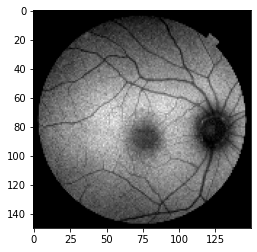

In [4]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=25,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

image_file_name = train_dir + '/train_norma/norma.0.jpg'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

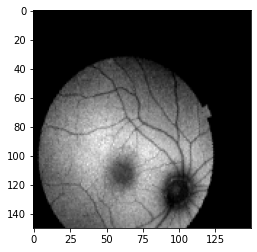

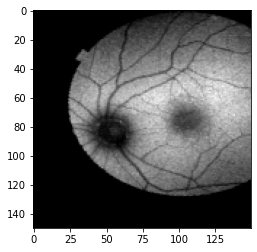

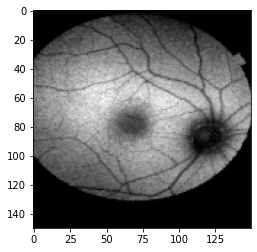

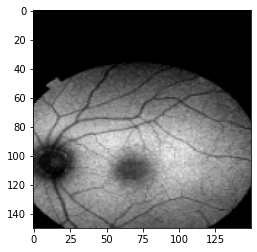

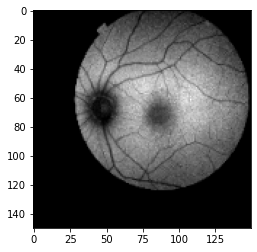

In [5]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:
        break
plt.show()

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 18 images belonging to 8 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 10 images belonging to 8 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8 images belonging to 8 classes.


In [22]:
# Deep Learning
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding="same" , activation="relu", input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid')) # bottleneck
model.add(Dense(8, activation='sigmoid'))

#Do not use softmax for multilabel classification
#Softmax is useful for mutually exclusive classes, either cat or dog but not both.
#Also, softmax outputs all add to 1. So good for multi class problems where each
#class is given a probability and all add to 1. Highest one wins. 

#Sigmoid outputs probability. Can be used for non-mutually exclusive problems.
#like multi label, in this example.
#But, also good for binary mutually exclusive (cat or not cat). 

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 200, 16)      1216      
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 200, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 32)      12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 64)       

In [24]:
#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

history = model.fit_generator(
    train_generator,
    steps_per_epoch=2,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1)

Epoch 1/25
2/2 [==============================] - 15s 6s/step - loss: 0.6206 - accuracy: 0.1944 - val_loss: 0.6094 - val_accuracy: 0.1000
Epoch 2/25
2/2 [==============================] - 10s 6s/step - loss: 0.5764 - accuracy: 0.1898 - val_loss: 0.6014 - val_accuracy: 0.1000
Epoch 3/25
2/2 [==============================] - 10s 5s/step - loss: 0.5679 - accuracy: 0.3222 - val_loss: 0.5919 - val_accuracy: 0.1000
Epoch 4/25
2/2 [==============================] - 9s 5s/step - loss: 0.5682 - accuracy: 0.1407 - val_loss: 0.5823 - val_accuracy: 0.2000
Epoch 5/25
2/2 [==============================] - 8s 4s/step - loss: 0.5545 - accuracy: 0.2731 - val_loss: 0.5741 - val_accuracy: 0.2000
Epoch 6/25
2/2 [==============================] - 10s 5s/step - loss: 0.5776 - accuracy: 0.0370 - val_loss: 0.5690 - val_accuracy: 0.2000
Epoch 7/25
2/2 [==============================] - 8s 4s/step - loss: 0.5602 - accuracy: 0.2315 - val_loss: 0.5652 - val_accuracy: 0.2000
Epoch 8/25
2/2 [=====================

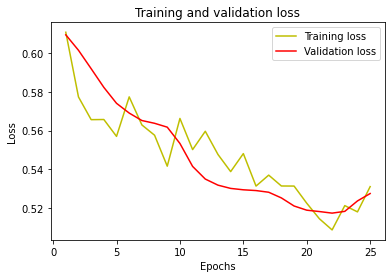

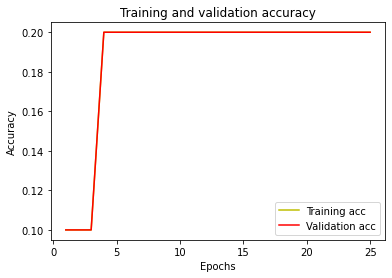

In [26]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
scores = model.evaluate_generator(test_generator, 50)

print("\nТочность на тестовых данных: %.2f%%" % (scores[1]*100))



Точность на тестовых данных: 12.50%


6


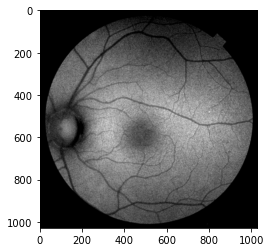

In [29]:
# predict for my data
new_path = './mydata/test/test_norma/norma.0.jpg'
image_result=Image.open(new_path)

img_width,img_height = 200, 200 # как при тренировке исходной модели

def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width,img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

# img = image.load_img(new_path, target_size=(img_width,img_height,3))
# img = image.img_to_array(img)
# img = np.expand_dims(img, axis=0)
# img = img/255.

img = data_resizing_process(new_path)
result = model.predict(img)
print(np.argmax(result))

image_result=plt.imshow(image_result)
#plt.title(Categories[np.argmax(result)])
plt.show()

In [30]:
model.save('simple_model_with_bottleneck.h5')